# Survey Participation

This image summarizes the results of this analysis, counting how many people participated in each survey and each pair/triple of surveys.

![venn_participation_counts](data/results/venn_participation_counts.png)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import,-load-data" data-toc-modified-id="Import,-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import, load data</a></span></li><li><span><a href="#Go" data-toc-modified-id="Go-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Go</a></span></li></ul></div>

In [1]:
DATA_INPUT_DIR = 'data/postprocessed'
OUTPUT_PLOT_FILENAME = 'data/results/venn_participation_counts.png'

<div style="background-color: #A33;height: 20px"></div> <!-- Red bar -->

## Import, load data

In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

# Plot directly in notebook
# NOTE: break this command into it's own cell, and run
# it BEFORE everything below it. Unfortunately that's
# the only way to get the plot settings to stick.
%matplotlib inline

Everett Wetchler 2019-11-06 10:41:52 PST 

CPython 3.6.5
IPython 7.8.0

numpy 1.17.3
pandas 0.25.1
matplotlib 3.1.0
seaborn 0.9.0
watermark 2.0.1


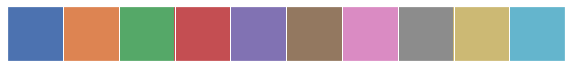

In [3]:
import datetime as dt
import os
import random
import simplejson as json

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

# Customize default chart graphics
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# It's useful to have some named colors handy
(SNS_BLUE, SNS_ORANGE, SNS_GREEN,
 SNS_RED, SNS_PURPLE, SNS_BROWN,
 SNS_PINK, SNS_GRAY, SNS_YELLOW,
 SNS_CYAN) = sns.color_palette()
sns.palplot(sns.color_palette())

# Watermark extension to print version/system information
# Flags:
# -a [author] --v (python/ipython versions) -d (date)
# -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version)
# -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -v -d -t -z -w -p numpy,pandas,matplotlib,seaborn

####################################################
# END Boilerplate
####################################################

In [4]:
from matplotlib_venn import venn3
from sklearn import decomposition
from sklearn import preprocessing

from everett import eda
from wrangler import DataWrangler

In [5]:
prefrosh = pd.read_csv(os.path.join(DATA_INPUT_DIR, 'prefrosh.csv'))
prefrosh.head()

,PID,NID,DID,Extraversion,BAS,NTB,EC,PD,PT,Prosociality,Loneliness,Loneliness_R,PSS,PSS_R,Subj_Happiness,SWL,MalleableEmpathy,EMPATHY,POSITIVITY,NEGATIVITY,LIFE_SATISFACTION,questions_complete,questions_incomplete,scores_complete,scores_incomplete,time_seconds,time_minutes,date
0,UPl0A7hyV0,NaN,NaN,1.000,1.769231,2.1,3.00,1.50,3.00,3.166667,1.750,2.250,1.00,3.00,4.00,3.8,4.000000,3.291667,1.384615,1.800,3.26250,83,0,18,0,377,6,2018-09-10 16:12:15
1,ra1xsp248Q,NaN,NaN,1.875,2.461538,3.0,3.75,1.25,2.75,3.833333,1.875,2.125,2.50,1.50,2.75,4.4,3.333333,3.416667,2.168269,2.125,2.69375,83,0,18,0,385,6,2018-09-10 16:12:19
2,IqidLJtjxg,11.0,11.0,2.875,2.461538,1.8,3.25,2.00,3.00,3.250000,1.000,3.000,0.25,3.75,5.00,5.2,2.000000,2.875000,2.668269,1.900,4.23750,83,0,18,0,425,7,2018-09-10 16:13:12
3,GR9ggA8Ajc,9.0,9.0,3.375,2.461538,2.4,2.25,1.00,1.75,2.750000,0.750,3.250,1.50,2.50,4.75,6.0,4.333333,2.770833,2.918269,1.700,4.12500,83,0,18,0,449,7,2018-09-10 16:13:52
4,vgxlTMkQs5,7.0,7.0,1.250,1.769231,3.4,3.00,1.25,3.00,2.833333,2.750,1.250,2.50,1.50,1.25,3.0,2.000000,2.708333,1.509615,2.325,1.75000,83,0,18,0,454,7,2018-09-10 16:14:14


In [6]:
trait = pd.read_csv(os.path.join(DATA_INPUT_DIR, 'trait.csv'))
trait.head()

,PID,NID,DID,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,CESD,STAI_Anxiety,Need_Belong,Prosociality,Loneliness,PSS,SubjHappiness,SWLS,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,beq.nex,beq.pex,beq.str,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,questions_complete,questions_incomplete,scores_complete,scores_incomplete,time_seconds,time_minutes,date
0,01DGcnKSFh,10,10,5.5,7.0,6.0,5.0,4.400000,5.714286,7.00,7.50,7.50,7.25,3.2,3.631579,4.3,3.666667,0.875,1.25,7.50,6.6,2.666667,5.125,4.625,1.5,17,3.500000,4.00,4.00,3.75,3.25,3.0,3.75,4.25,5.50,5.000000,7.75,5.666667,6.000000,4.50,4.750,3.000000,4.75,4.25,5.0,2.75,7.000000,6.000000,2.0,5.333333,2.75,3.666667,2.714286,1.000000,395,9,51,0,412913,6881,2018-10-06 11:43:51
1,060uyicrNj,9,9,3.5,4.5,3.5,6.0,4.333333,4.714286,6.50,6.25,5.75,6.75,3.6,2.842105,4.3,2.666667,1.875,1.75,5.25,6.2,3.833333,5.375,5.750,2.2,10,3.357143,2.50,3.25,3.25,2.50,3.0,3.25,4.25,4.00,3.166667,5.75,5.666667,4.500000,5.00,4.625,4.571429,4.50,4.00,3.6,5.00,6.333333,4.833333,5.0,4.500000,4.75,2.000000,2.428571,2.142857,395,9,51,0,6291,104,2018-10-05 18:44:03
2,08JYVDNSVE,2,2,7.0,8.0,6.0,6.5,3.666667,6.000000,7.25,7.75,6.00,4.50,3.2,3.578947,5.0,2.666667,2.000,2.75,4.75,5.4,4.000000,5.375,5.250,2.9,10,3.785714,2.75,3.50,3.50,3.00,3.0,3.25,6.00,4.50,7.166667,8.00,7.000000,5.500000,4.75,4.375,6.000000,3.50,4.50,5.0,4.50,6.833333,4.166667,2.0,3.500000,6.00,3.500000,3.285714,2.428571,395,9,51,0,9974,166,2018-10-05 16:39:09
3,09sqjhTBY5,4,4,2.5,4.5,6.0,5.5,3.066667,4.142857,5.00,6.75,4.25,3.00,2.4,2.473684,3.8,3.333333,1.125,0.75,4.75,4.8,3.500000,6.750,4.750,2.3,13,2.357143,3.25,3.25,3.25,3.25,2.0,3.25,5.00,4.25,3.500000,6.00,6.333333,5.000000,4.25,3.750,4.142857,3.50,4.00,4.2,4.25,4.666667,3.166667,2.0,3.166667,2.50,2.833333,2.142857,2.571429,396,8,51,0,2777,46,2018-10-07 17:30:58
4,0fgViPMzN8,7,7,6.0,6.5,7.0,5.5,3.600000,4.428571,6.75,6.00,4.50,3.25,2.8,2.526316,4.2,3.333333,0.500,1.25,6.25,6.0,0.500000,5.375,5.375,1.2,19,3.142857,4.00,4.00,3.50,3.75,3.0,4.00,5.00,4.00,4.333333,5.50,6.666667,5.833333,4.00,4.125,4.285714,3.50,2.25,4.0,6.25,6.166667,5.166667,2.0,3.166667,3.50,3.166667,2.428571,1.428571,395,9,51,0,2337,38,2018-10-07 17:35:17


In [8]:
wb = pd.read_csv(os.path.join(DATA_INPUT_DIR, 'wellbeing_spring.csv'))
wb.head()

,PID,dorm,Wellbeing_self_17,Lonely,Stressed,Satisfied,Rumination,Wellbeing_self_18,Social_Anxiety,Wellbeing_self_22,Anxiety_1,Anxiety_2,Wellbeing_self_19,Depression,Anhedonia,Wellbeing_self_21,Belonging,Wellbeing,scores_missing
0,6jHJKaD4Cb,Alondra,4.0,4.0,0.0,4.0,0.0,4.0,4.0,4.0,2.0,0.0,4.0,4.0,0.0,4.0,4.0,2.714286,0
1,vcM4I7ahKq,Alondra,2.0,1.0,2.0,2.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.357143,0
2,GRS7z5mppv,Alondra,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,3.785714,0
3,eaZChV6Zzv,Alondra,4.0,4.0,0.0,3.0,2.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.928571,0
4,95dslV1gqt,Alondra,4.0,1.0,1.0,1.0,3.0,2.0,4.0,2.0,2.0,3.0,1.0,2.0,4.0,1.0,1.0,2.214286,0


<div style="background-color: #A33;height: 20px"></div> <!-- Red bar -->

## Go

In [9]:
pid_p = set(prefrosh['PID'])
pid_t = set(trait['PID'])
pid_w = set(wb['PID'])
pid_all = pid_p | pid_t | pid_w

In [10]:
len(pid_p), len(prefrosh)

(636, 636)

In [11]:
len(pid_t), len(trait)

(305, 305)

In [12]:
len(pid_w), len(wb)

(514, 546)

In [13]:
sw = wb['PID'].value_counts()
sw = sw[sw > 1]
dups = list(sw.index)
print(len(sw))
sw

32


VJlYs0VXzK    2
pRDnGQRKZg    2
EDXX25pBlE    2
hT1aAbxR0H    2
ZkLlaLrQkh    2
08JYVDNSVE    2
hXXJP4LVgE    2
XicY81sN67    2
4JUkminEM3    2
uMsszd9Khr    2
jnK5jx7q06    2
VHjizYJkyi    2
vCNkJU8MA8    2
GYnW94nX7B    2
1u2tzPdBLc    2
gzMvr3oLnV    2
GRS7z5mppv    2
LAfdXRuk2x    2
FvthLHo3QC    2
WcEZKcxv1I    2
4gbINa6DSz    2
rWmuqC4Aol    2
BHYvhY9zbm    2
48w44a1YPy    2
dcNG8Y644g    2
L38VzijXk1    2
eaZChV6Zzv    2
yvMU3B38rq    2
SNE0yhvvVL    2
xwDKYVEmBz    2
hvUrmQwI4F    2
LEJbOsQX0x    2
Name: PID, dtype: int64

In [14]:
wb[wb['PID'].isin(dups)].sort_values('PID')

,PID,dorm,Wellbeing_self_17,Lonely,Stressed,Satisfied,Rumination,Wellbeing_self_18,Social_Anxiety,Wellbeing_self_22,Anxiety_1,Anxiety_2,Wellbeing_self_19,Depression,Anhedonia,Wellbeing_self_21,Belonging,Wellbeing,scores_missing
51,08JYVDNSVE,Cedro,2.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.571429,0
74,08JYVDNSVE,Cedro,2.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.928571,0
57,1u2tzPdBLc,Cedro,2.0,3.0,1.0,3.0,4.0,3.0,4.0,2.0,2.0,3.0,2.0,3.0,4.0,2.0,3.0,2.714286,0
71,1u2tzPdBLc,Cedro,3.0,3.0,1.0,1.0,3.0,2.0,4.0,1.0,2.0,3.0,2.0,4.0,4.0,1.0,2.0,2.428571,0
62,48w44a1YPy,Cedro,1.0,3.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,3.0,2.071429,0
66,48w44a1YPy,Cedro,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,1.0,4.0,1.500000,0
133,4JUkminEM3,Frosoco,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,0
109,4JUkminEM3,Frosoco,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,0
138,4gbINa6DSz,Frosoco,1.0,3.0,0.0,0.0,3.0,2.0,3.0,0.0,1.0,3.0,1.0,4.0,4.0,0.0,3.0,1.785714,0
103,4gbINa6DSz,Frosoco,3.0,4.0,0.0,1.0,2.0,2.0,4.0,0.0,3.0,4.0,1.0,4.0,4.0,0.0,4.0,2.285714,0


In [15]:
print(f'{len(pid_p)} Ps took the prefrosh survey')
print(f'{len(pid_t)} Ps took the trait survey')
print(f'{len(pid_w)} Ps took the well-being survey')

rows = []
for p in pid_all:
    rows.append([p in pid_p, p in pid_t, p in pid_w])
df = pd.DataFrame(rows, columns=['prefrosh', 'trait', 'well-being'])
table = df.groupby(list(df.columns)).size()
table.name='participants'
counts_df = table.reset_index()
counts_df

636 Ps took the prefrosh survey
305 Ps took the trait survey
514 Ps took the well-being survey


,prefrosh,trait,well-being,participants
0,False,False,True,224
1,False,True,False,85
2,False,True,True,100
3,True,False,False,422
4,True,False,True,94
5,True,True,False,24
6,True,True,True,96


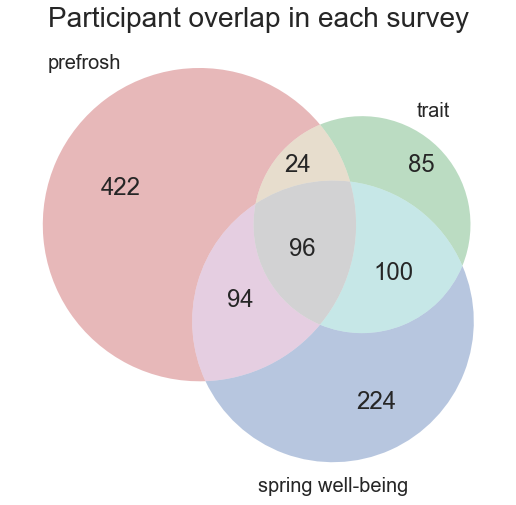

In [16]:
fig, ax = plt.subplots(1)
fig.set_size_inches(9, 9)
ax.set_title('Participant overlap in each survey', fontsize=28)
labels = ['prefrosh', 'trait', 'spring well-being']
v = venn3(ax=ax, set_labels=labels, subsets = (
    table[1, 0, 0], table[0, 1, 0], table[1, 1, 0],
    table[0, 0, 1], table[1, 0, 1], table[0, 1, 1], table[1, 1, 1]))

for lab in v.set_labels:
    lab.set_fontsize(20)
for lab in v.subset_labels:
    lab.set_fontsize(24)

fig.savefig(OUTPUT_PLOT_FILENAME)